In [6]:
import rasterio 
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
intiff = './CA_Forest_Fire_1985-2020/CA_Forest_Fire_1985-2020.tif'
inshp = './BC_Boundary(1)/BC_Boundary.shp'
outtiff = './outputs/forest_fire.tif'
bc = gpd.read_file(inshp)
bc

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,Shape_Leng,Shape_Area,geometry
0,59,British Columbia,British Columbia,Colombie-Britannique,B.C.,C.-B.,917733.0,948292.0,2870620.0,3.582087e+07,9.482918e+11,"MULTIPOLYGON (((475625.867 1703408.670, 476319..."


In [3]:
with rasterio.open(intiff) as src: 
    bc = bc.to_crs(src.crs)
    out_image, out_transform = mask(src, bc.geometry, crop=True)
    out_meta=src.meta.copy()

out_meta.update({
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})
              
with rasterio.open(outtiff,'w',**out_meta) as dst:
    dst.write(out_image)

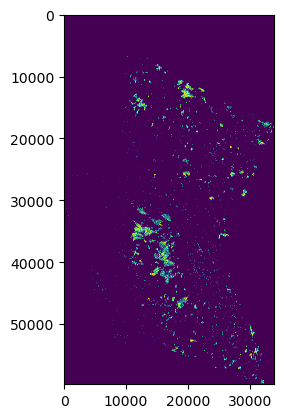

In [7]:
with rasterio.open('./outputs/forest_fire.tif') as src:
    plt.imshow(src.read(1))
    plt.show()